In [ ]:
import numpy as np
import torch 
from pyhessian.utils import *
from models import ResNet18
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.pyplot as plt
from data_visualisation_utils import Data_Visualisation

Plot results on the ResNet18 and the Transformer model and generate performance 
Can view results in wandb: 
ResNet18: https://wandb.ai/1848014170/train_resnet18?nw=nwuser1848014170 
Transformer: https://wandb.ai/1848014170/train_transformer?nw=nwuser1848014170 


In [47]:
# load data
resnet18_data_hessian_analysis = {

  'SSDH':  'results/train_resnet18_final/by_epoch_with_hessian_analysis/train_resnet18_cifar10_with_analysis_extra_ssdh_128epochs',
  'SADH': 'results/train_resnet18_final/by_epoch_with_hessian_analysis/train_resnet18_cifar10_with_analysis_sadh_128epochs',

  'SSVP': 'results/train_resnet18_final/by_epoch_with_hessian_analysis/train_resnet18_cifar10_with_analysis_extra_ssvp_128epochs',
  'Sophia': 'results/train_resnet18_final/by_epoch_with_hessian_analysis/train_resnet18_cifar10_with_analysis_sophia_128epochs',
    'Adam': 'results/train_resnet18_final/by_epoch_with_hessian_analysis/train_resnet18_cifar10_with_analysis_extra_adam_128epochs',
    'SGDM': 'results/train_resnet18_final/by_epoch_with_hessian_analysis/train_resnet18_cifar10_with_analysis_sgdm_128epochs',
}

resnet18_data_by_iterations = {
  'Adam': [
      'results/train_resnet18_final/by_iterations/train_resnet18_adam_128epochs_rs_1010_update10',
      'results/train_resnet18_final/by_iterations/train_resnet18_adam_128epochs_rs_110111_update10',
      'results/train_resnet18_final/by_iterations/train_resnet18_adam_128epochs_rs_111011_update10',
      'results/train_resnet18_final/by_iterations/train_resnet18_adam_128epochs_rs_10100202_update10',
  ],
  'SADH': [
      'results/train_resnet18_final/by_iterations/train_resnet18_sadh_128epochs_rs_1010_update10',
      'results/train_resnet18_final/by_iterations/train_resnet18_sadh_128epochs_rs_110111_update10',
      'results/train_resnet18_final/by_iterations/train_resnet18_sadh_128epochs_rs_111011_update10',
      'results/train_resnet18_final/by_iterations/train_resnet18_sadh_128epochs_rs_10100202_update10',
  ],
  'SGDM': [
      'results/train_resnet18_final/by_iterations/train_resnet18_sgdm_128epochs_rs_1010_update10',
      'results/train_resnet18_final/by_iterations/train_resnet18_sgdm_128epochs_rs_110111_update10',
      'results/train_resnet18_final/by_iterations/train_resnet18_sgdm_128epochs_rs_111011_update10',
      'results/train_resnet18_final/by_iterations/train_resnet18_sgdm_128epochs_rs_10100202_update10',
  ],
  'Sophia': [
    'results/train_resnet18_final/by_iterations/train_resnet18_sophia_128epochs_rs_1010_update10',
    'results/train_resnet18_final/by_iterations/train_resnet18_sophia_128epochs_rs_110111_update10',
    'results/train_resnet18_final/by_iterations/train_resnet18_sophia_128epochs_rs_111011_update10',
    'results/train_resnet18_final/by_iterations/train_resnet18_sophia_128epochs_rs_10100202_update10',
  ],
  'SSDH': [
      'results/train_resnet18_final/by_iterations/train_resnet18_ssdh_128epochs_rs_1010_update10',
      'results/train_resnet18_final/by_iterations/train_resnet18_ssdh_128epochs_rs_110111_update10',
      'results/train_resnet18_final/by_iterations/train_resnet18_ssdh_128epochs_rs_111011_update10',
      'results/train_resnet18_final/by_iterations/train_resnet18_ssdh_128epochs_rs_10100202_update10',
  ],
  'SSVP': [
    'results/train_resnet18_final/by_iterations/train_resnet18_ssvp_128epochs_rs_1010_update10',
    'results/train_resnet18_final/by_iterations/train_resnet18_ssvp_128epochs_rs_110111_update10',
    'results/train_resnet18_final/by_iterations/train_resnet18_ssvp_128epochs_rs_111011_update10',
    'results/train_resnet18_final/by_iterations/train_resnet18_ssvp_128epochs_rs_10100202_update10'
  ]
}

resnet18_iteration_variables = [
    'training_loss',
    'training_acc',
    'gradient_norm',
    'clip_pct',
    'hessian_term_norm',
    'exp_avg_sq_norm',
    'test_acc',
    'runtime_per_iteration'
]

transformer_data = {
    'Adam': [
        'results/train_transformer_final/train_transformer_adam_bs128_rs1010',
        'results/train_transformer_final/train_transformer_adam_bs128_rs110111',
        'results/train_transformer_final/train_transformer_adam_bs128_rs111011',
        'results/train_transformer_final/train_transformer_adam_bs128_rs10100202'
    ],
    'SADH':[
        'results/train_transformer_final/train_transformer_sadh_bs128_rs1010',
        'results/train_transformer_final/train_transformer_sadh_bs128_rs110111',
        'results/train_transformer_final/train_transformer_sadh_bs128_rs111011',
        'results/train_transformer_final/train_transformer_sadh_bs128_rs10100202',
    ],
    'SGDM': [
        'results/train_transformer_final/train_transformer_sgdm_bs128_rs1010',
        'results/train_transformer_final/train_transformer_sgdm_bs128_rs110111',
        'results/train_transformer_final/train_transformer_sgdm_bs128_rs111011',
        'results/train_transformer_final/train_transformer_sgdm_bs128_rs10100202',

    ],
    'Sophia': [
        'results/train_transformer_final/train_transformer_sophia_bs128_rs1010',
        'results/train_transformer_final/train_transformer_sophia_bs128_rs110111',
        'results/train_transformer_final/train_transformer_sophia_bs128_rs111011',
        'results/train_transformer_final/train_transformer_sophia_bs128_rs10100202',
    ],

    'SSDH': [
        'results/train_transformer_final/train_transformer_ssdh_bs128_rs1010',
        'results/train_transformer_final/train_transformer_ssdh_bs128_rs110111',
        'results/train_transformer_final/train_transformer_ssdh_bs128_rs111011',
        'results/train_transformer_final/train_transformer_ssdh_bs128_rs10100202',
    ],

    'SSVP': [
        'results/train_transformer_final/train_transformer_ssvp_bs128_rs1010',
        'results/train_transformer_final/train_transformer_ssvp_bs128_rs110111',
        'results/train_transformer_final/train_transformer_ssvp_bs128_rs111011',
        'results/train_transformer_final/train_transformer_ssvp_bs128_rs10100202',
    ]
}






transformer_variables = [
    'training_loss',
    'training_ppl',
    'valid_loss',
    'valid_ppl',
    'test_loss',
    'test_ppl',
    'clip_pct',
    'gradient_norm',
    'denominator_norm',
    'runtime_per_step',
    

]

In [48]:
#class for supporting plotting
class Resnet18_Hessian_Analysis():
    def __init__(self, optimiser_name, file_path):
        self.optimiser_name = optimiser_name
        self.top1_eigenvalue = {}
        self.top2_eigenvalue = {}
        self.top1_eigenvec = {}
        self.top2_eigenvec = {}
        self.trace = {}
        self.net_state_dict = {}
        self.file_path = file_path
        for epoch in [8, 16, 32, 64, 96, 128]:
            for root, dirs, files in os.walk(file_path, topdown=False):
                ckpt_name = 'epoch{}_ckpt_with_hessian_analysis.pth'.format(epoch)
                # checkpoint dict keys: ['net_state', 'eigenvalues', 'eigenvectors', 'trace_vector']
                for f in files:
                    if f == ckpt_name:
                        ckpt_dict = torch.load(os.path.join(root, ckpt_name), map_location=torch.device('cpu'))
                        self.top1_eigenvalue[epoch], self.top2_eigenvalue[epoch] = ckpt_dict['eigenvalues'] 
                        self.top1_eigenvec[epoch], self.top2_eigenvec[epoch] = ckpt_dict['eigenvectors']
                        self.trace[epoch] = torch.tensor(ckpt_dict['trace_vector']).mean().item()
                        self.net_state_dict[epoch] = ckpt_dict['net_state']
        
    def get_trace(self,):
        pass

    def plot_top1_eigenval(self):
        # plt.figure(figsize=(10, 5))
        plt.semilogy(list(self.top1_eigenvalue.keys()), list(self.top1_eigenvalue.values()), label=self.optimiser_name)
        # plt.show()
        
    def plot_top2_eigenval(self):
            plt.plot(list(self.top2_eigenvalue.keys()), list(self.top2_eigenvalue.values()), label=self.optimiser_name)


    def loss_landscape_visualisation_by_epoch(self, epoch):
        lams_X = np.linspace(-0.001, 0.001, 20).astype(np.float64)
        lams_Y = np.linspace(-0.001, 0.001, 20).astype(np.float64)

        def perturb_model_params(orig_model, model_perb, eigenvec1, eigenvec2, alpha1, alpha2):
            for m_orig, m_perb, d1, d2 in zip(orig_model.parameters(), model_perb.parameters(), eigenvec1, eigenvec2):
                m_perb.data = m_orig.data + alpha1 * d1 + alpha2*d2
            return model_perb
        
        raw_model = ResNet18().load_state_dict(self.net_state_dict[epoch])
        
        


    


In [49]:
# Set plotting configurations
plt.rcParams['font.size'] = 17  # Default font size for all text
plt.rcParams['axes.titlesize'] = 20  # Font size for subplot titles
plt.rcParams['axes.labelsize'] = 18  # Font size for axis labels
plt.rcParams['xtick.labelsize'] = 16  # Font size for x-tick labels
plt.rcParams['ytick.labelsize'] = 16  # Font size for y-tick labels
plt.rcParams['legend.fontsize'] = 16  # Font size for legends
plt.rcParams['lines.linewidth'] = 2
colors = {
    'SSDH': '#595959',
    'SSVP': '#006BA4',
    'SADH': '#C85200',
    'Sophia': '#ABABAB',
    'Adam': '#5F9ED1',
    'SGDM': '#FF800E'
}
linewidth = 0.5
linecolor = 'black'
arrowstyle = '-'
x_right_increment = 1



In [50]:
# Create Dictionary to plot data
resnet18_data_dict = {}
transformer_data_dict = {}
for opt_name, files_path in resnet18_data_by_iterations.items():
    resnet18_data_dict[opt_name] = Data_Visualisation(opt_name, files_path, resnet18_iteration_variables)

for opt_name, files_path in transformer_data.items():
    transformer_data_dict[opt_name] = Data_Visualisation(opt_name, files_path, transformer_variables)

In [7]:
# Make performance metrics
rolling_window = 196
test_metrics_resnet18 = {}
test_metrics_index_resnet18 = ['test_acc_mean', 'test_acc_std', 'first_pass_pct', 'first_pass_runtime']
for opt_name, data_dict in resnet18_data_dict.items():
    test_acc_mean = data_dict.get_series_mean('test_acc')
    end_test_acc = test_acc_mean.iloc[-1]
    test_acc_std = data_dict.get_series_std('test_acc').iloc[-1]
    first_pass = test_acc_mean[test_acc_mean >= end_test_acc-test_acc_std].head(1).index[0]
    cumsum_runtime = data_dict.get_series_mean('runtime_per_iteration').cumsum()
    first_pass_runtime = cumsum_runtime[first_pass]
    test_metrics_resnet18[opt_name] = [end_test_acc*100, test_acc_std*100, first_pass*100/len(test_acc_mean), first_pass_runtime]

resnet18_test_performance_metrics = pd.DataFrame(test_metrics_resnet18, index=test_metrics_index_resnet18).round(2)


training_metrics_resnet18 = {}
training_metrics_index_resnet18 = ['Iteration_pct', 'runtime', 'end_training_loss', 'end_training_acc']

for opt_name, data_dict in resnet18_data_dict.items():
    mean_train_acc = data_dict.get_series_mean('training_acc').rolling(rolling_window).mean()
    first_pass = mean_train_acc[mean_train_acc >= 0.999].head(1).index[0]
    cumsum_runtime = data_dict.get_series_mean('runtime_per_iteration').cumsum()
    first_pass_runtime = cumsum_runtime[first_pass]
    mean_loss = data_dict.get_series_mean('training_loss').rolling(rolling_window).mean().iloc[-1]
    training_metrics_resnet18[opt_name] = [first_pass*100/len(mean_train_acc), first_pass_runtime, mean_loss, 100*mean_train_acc.iloc[-1]]

resnet18_training_metrics = pd.DataFrame(training_metrics_resnet18, index=training_metrics_index_resnet18)



In [9]:
resnet18_test_performance_metrics.T

,test_acc_mean,test_acc_std,first_pass_pct,first_pass_runtime
Adam,93.18,0.29,80.46,290.05
SADH,92.52,0.38,60.93,1228.50
SGDM,92.84,0.08,73.43,233.44
Sophia,93.08,0.22,73.43,1513.64
SSDH,92.44,0.24,70.31,1450.39
SSVP,92.64,0.18,38.28,782.71


In [21]:
resnet18_training_metrics.T.round(2)

,Iteration_pct,runtime,end_training_loss,end_training_acc
Adam,76.56,276.18,0.0,99.98
SADH,63.26,1275.54,0.0,99.98
SGDM,56.68,180.40,0.0,100.00
Sophia,78.96,1627.54,0.0,99.98
SSDH,60.98,1258.03,0.0,99.99
SSVP,43.09,881.15,0.0,99.98


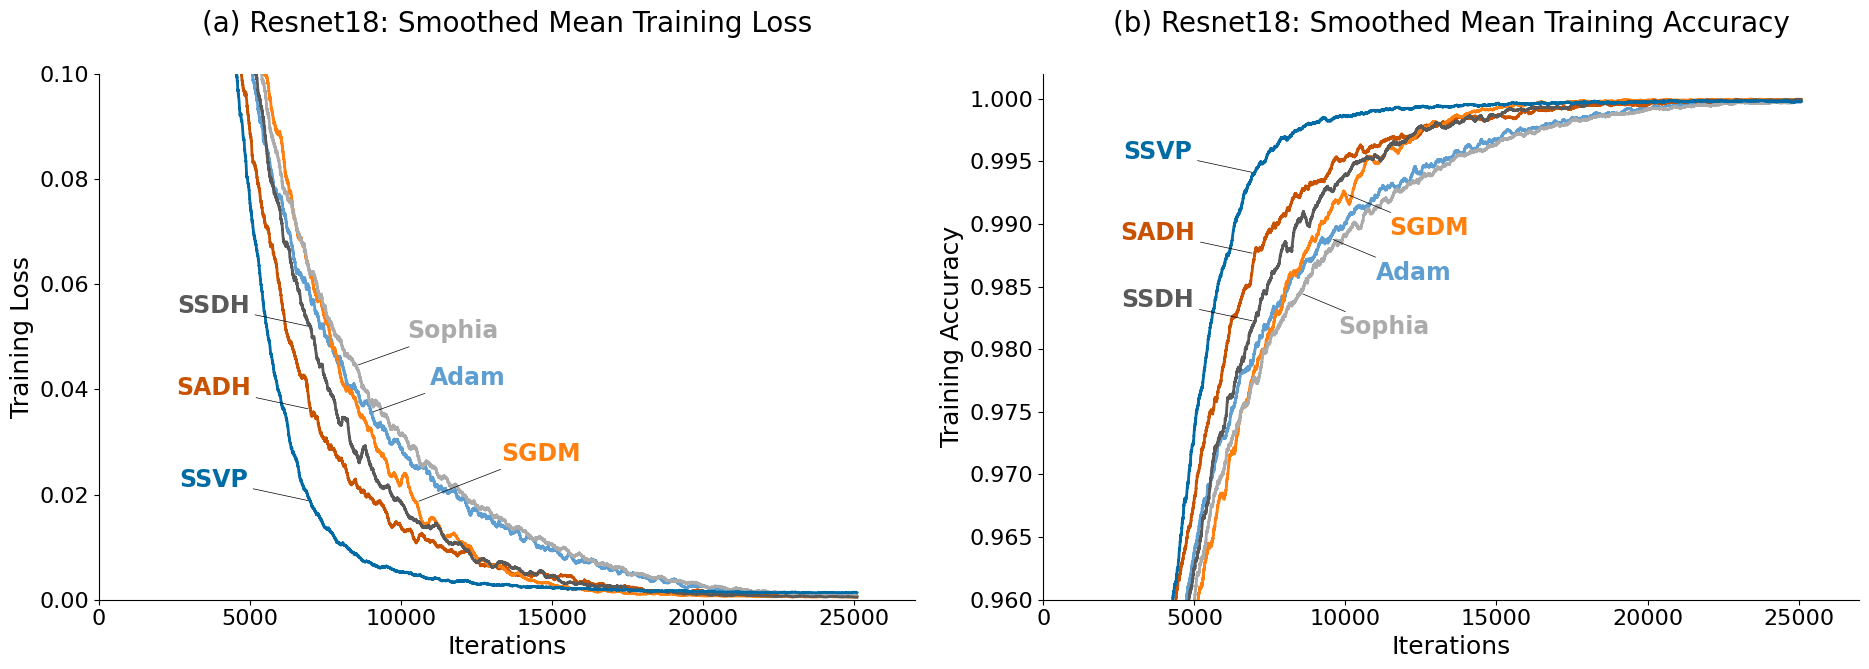

In [36]:
# plot the training loss and training acc for resnet18

var_to_plot1 = 'training_loss'
var_to_plot2 = 'training_acc'

fig, axs = plt.subplots(1, 2, figsize=(19, 7))
for opt_name, data_dict in resnet18_data_dict.items():
    loss = data_dict.get_series_mean('training_loss').rolling(rolling_window).mean()
    acc = data_dict.get_series_mean('training_acc').rolling(rolling_window).mean()
    axs[0].plot(loss, label=opt_name, c=colors[opt_name])
    axs[1].plot(acc, label=opt_name, c=colors[opt_name])


axs[0].annotate('SSVP', 
            xy=(list(range(len(resnet18_data_dict['SSVP'].get_series_mean(var_to_plot1).rolling(rolling_window).mean())))[7000], list(resnet18_data_dict['SSVP'].get_series_mean(var_to_plot1).rolling(rolling_window).mean())[7000]), 
            textcoords="offset points", 
            xytext=(-70,10), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSVP']
            ) 


axs[0].annotate('SADH', 
            xy=(list(range(len(resnet18_data_dict['SADH'].get_series_mean(var_to_plot1).rolling(rolling_window).mean())))[7000], list(resnet18_data_dict['SADH'].get_series_mean(var_to_plot1).rolling(rolling_window).mean())[7000]), 
            textcoords="offset points", 
            xytext=(-70,10), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SADH']
            ) 


axs[0].annotate('SGDM', 
            xy=(list(range(len(resnet18_data_dict['SGDM'].get_series_mean(var_to_plot1).rolling(rolling_window).mean())))[10500], list(resnet18_data_dict['SGDM'].get_series_mean(var_to_plot1).rolling(rolling_window).mean())[10500]), 
            textcoords="offset points", 
            xytext=(90,30), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SGDM']
            ) 

axs[0].annotate('Sophia', 
            xy=(list(range(len(resnet18_data_dict['Sophia'].get_series_mean(var_to_plot1).rolling(rolling_window).mean())))[8500], list(resnet18_data_dict['Sophia'].get_series_mean(var_to_plot1).rolling(rolling_window).mean())[8500]), 
            textcoords="offset points", 
            xytext=(70,20), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Sophia']
            ) 



axs[0].annotate('SSDH', 
            xy=(list(range(len(resnet18_data_dict['SSDH'].get_series_mean(var_to_plot1).rolling(rolling_window).mean())))[7000], list(resnet18_data_dict['SSDH'].get_series_mean(var_to_plot1).rolling(rolling_window).mean())[7000]), 
            textcoords="offset points", 
            xytext=(-70,10), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSDH']
            ) 

axs[0].annotate('Adam', 
            xy=(list(range(len(resnet18_data_dict['Adam'].get_series_mean(var_to_plot1).rolling(rolling_window).mean())))[9000], list(resnet18_data_dict['Adam'].get_series_mean(var_to_plot1).rolling(rolling_window).mean())[9000]), 
            textcoords="offset points", 
            xytext=(70,20), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Adam']
            ) 


axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)


axs[0].set_xlim(0, 27000)
axs[0].set_ylim(0, 0.1)
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('Training Loss')
axs[0].set_title('(a) Resnet18: Smoothed Mean Training Loss', pad=30)



axs[1].annotate('SSVP', 
            xy=(list(range(len(resnet18_data_dict['SSVP'].get_series_mean(var_to_plot2).rolling(196).mean())))[7000], list(resnet18_data_dict['SSVP'].get_series_mean(var_to_plot2).rolling(196).mean())[7000]), 
            textcoords="offset points", 
            xytext=(-70,10), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSVP']
            ) 


axs[1].annotate('SADH', 
            xy=(list(range(len(resnet18_data_dict['SADH'].get_series_mean(var_to_plot2).rolling(196).mean())))[7000], list(resnet18_data_dict['SADH'].get_series_mean(var_to_plot2).rolling(196).mean())[7000]), 
            textcoords="offset points", 
            xytext=(-70,10), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SADH']
            ) 


axs[1].annotate('SGDM', 
            xy=(list(range(len(resnet18_data_dict['SGDM'].get_series_mean(var_to_plot2).rolling(196).mean())))[10000], list(resnet18_data_dict['SGDM'].get_series_mean(var_to_plot2).rolling(196).mean())[10000]), 
            textcoords="offset points", 
            xytext=(60,-30), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SGDM']
            ) 

axs[1].annotate('Sophia', 
            xy=(list(range(len(resnet18_data_dict['Sophia'].get_series_mean(var_to_plot2).rolling(196).mean())))[8500], list(resnet18_data_dict['Sophia'].get_series_mean(var_to_plot2).rolling(196).mean())[8500]), 
            textcoords="offset points", 
            xytext=(60,-30), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Sophia']
            ) 



axs[1].annotate('SSDH', 
            xy=(list(range(len(resnet18_data_dict['SSDH'].get_series_mean(var_to_plot2).rolling(196).mean())))[7000], list(resnet18_data_dict['SSDH'].get_series_mean(var_to_plot2).rolling(196).mean())[7000]), 
            textcoords="offset points", 
            xytext=(-70,10), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSDH']
            ) 

axs[1].annotate('Adam', 
            xy=(list(range(len(resnet18_data_dict['Adam'].get_series_mean(var_to_plot2).rolling(196).mean())))[9500], list(resnet18_data_dict['Adam'].get_series_mean(var_to_plot2).rolling(196).mean())[9500]), 
            textcoords="offset points", 
            xytext=(60,-30), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Adam']
            ) 


axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)


axs[1].set_xlim(0, 27000)
axs[1].set_ylim(0.96, 1.002)
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('Training Accuracy')
axs[1].set_title('(b) Resnet18: Smoothed Mean Training Accuracy', pad=30)



plt.tight_layout()


plt.show()


Text(0, 0.5, 'Norm (Log Scale)')

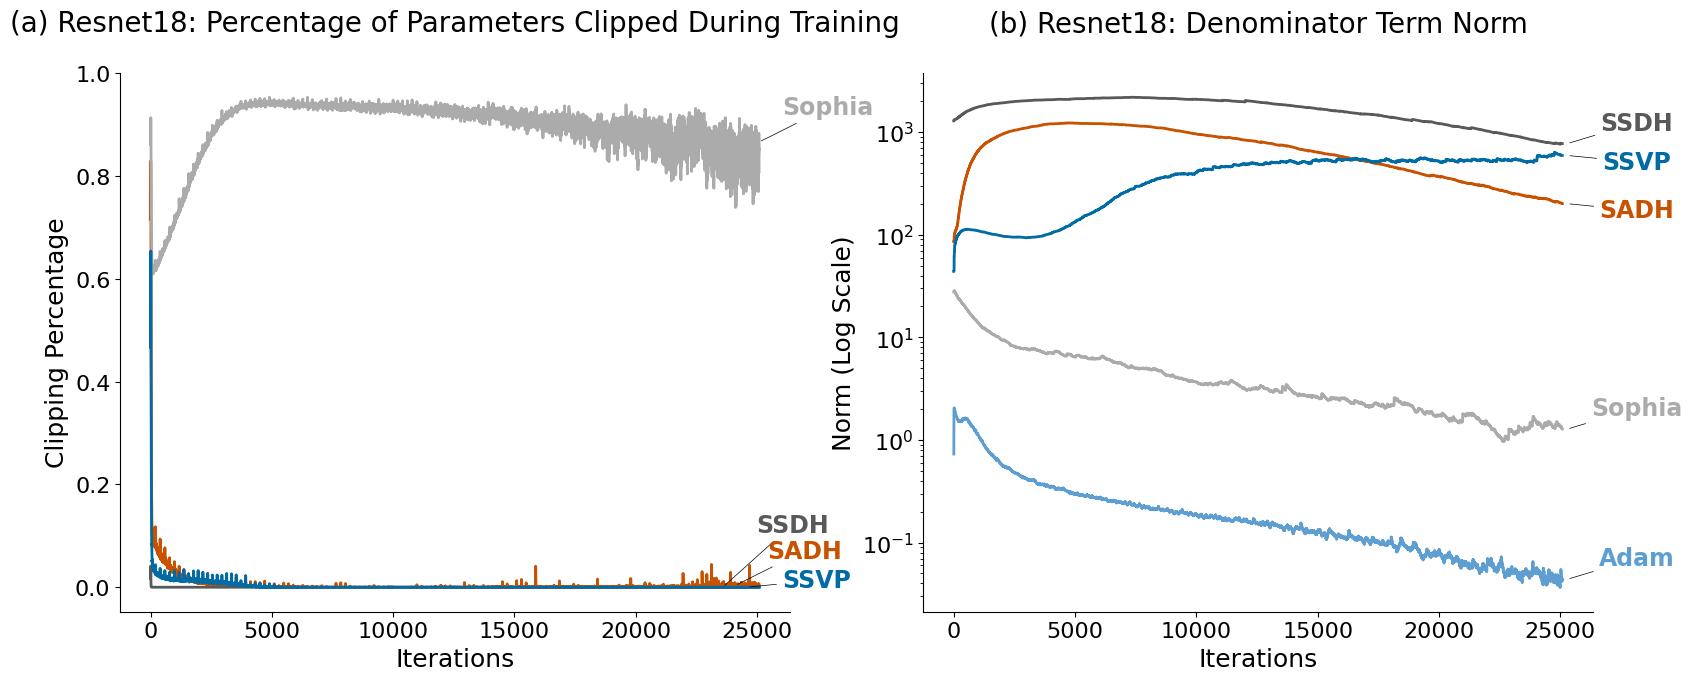

In [38]:
# plot denominator norm and clipping pct for resnet18

fig, axs = plt.subplots(1, 2, figsize=(19, 7))
for opt_name, data_dict in resnet18_data_dict.items():
    if opt_name == 'SGDM':
        continue
    if opt_name == 'Adam':
        denominator = data_dict.get_series_mean('exp_avg_sq_norm')
    else:
        denominator = data_dict.get_series_mean('hessian_term_norm')
    

    axs[1].semilogy(denominator, label=opt_name, c=colors[opt_name])

    clip_pct = data_dict.get_series_mean('clip_pct')
    if clip_pct is None:
        continue

    axs[0].plot(clip_pct, label=opt_name, c=colors[opt_name])


axs[0].annotate('Sophia', 
            xy=(list(range(len(resnet18_data_dict['Sophia'].get_series_mean('clip_pct'))))[-10], list(resnet18_data_dict['Sophia'].get_series_mean('clip_pct'))[-10]), 
            textcoords="offset points", 
            xytext=(50,20), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Sophia']
            ) 
axs[0].annotate('SSDH', 
            xy=(list(range(len(resnet18_data_dict['SSDH'].get_series_mean('clip_pct'))))[-1500], list(resnet18_data_dict['SSDH'].get_series_mean('clip_pct'))[-1500]), 
            textcoords="offset points", 
            xytext=(50,40), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSDH']
            ) 
axs[0].annotate('SADH', 
            xy=(list(range(len(resnet18_data_dict['SADH'].get_series_mean('clip_pct'))))[-1000], list(resnet18_data_dict['SADH'].get_series_mean('clip_pct'))[-1000]), 
            textcoords="offset points", 
            xytext=(50,20), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SADH']
            ) 
    
axs[0].annotate('SSVP', 
            xy=(list(range(len(resnet18_data_dict['SSVP'].get_series_mean('clip_pct'))))[-500], list(resnet18_data_dict['SSVP'].get_series_mean('clip_pct'))[-500]), 
            textcoords="offset points", 
            xytext=(50,0), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSVP']
            ) 


axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[0].set_title('(a) Resnet18: Percentage of Parameters Clipped During Training', pad=30)
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('Clipping Percentage')





axs[1].annotate('Sophia', 
            xy=(list(range(len(resnet18_data_dict['Sophia'].get_series_mean('hessian_term_norm'))))[-1]+200, list(resnet18_data_dict['Sophia'].get_series_mean('hessian_term_norm'))[-1]), 
            textcoords="offset points", 
            xytext=(50,10), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Sophia']
            ) 

axs[1].annotate('SSDH', 
            xy=(list(range(len(resnet18_data_dict['SSDH'].get_series_mean('hessian_term_norm'))))[-1]+200, list(resnet18_data_dict['SSDH'].get_series_mean('hessian_term_norm'))[-1]), 
            textcoords="offset points", 
            xytext=(50,10), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSDH']
            ) 



axs[1].annotate('SADH', 
            xy=(list(range(len(resnet18_data_dict['SADH'].get_series_mean('hessian_term_norm'))))[-1]+200, list(resnet18_data_dict['SADH'].get_series_mean('hessian_term_norm'))[-1]), 
            textcoords="offset points", 
            xytext=(50,-10), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SADH']
            ) 


axs[1].annotate('SSVP', 
            xy=(list(range(len(resnet18_data_dict['SSVP'].get_series_mean('hessian_term_norm'))))[-1]+200, list(resnet18_data_dict['SSVP'].get_series_mean('hessian_term_norm'))[-1]), 
            textcoords="offset points", 
            xytext=(50,-10), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSVP']
            ) 


axs[1].annotate('Adam', 
            xy=(list(range(len(resnet18_data_dict['Adam'].get_series_mean('exp_avg_sq_norm'))))[-1]+200, list(resnet18_data_dict['Adam'].get_series_mean('exp_avg_sq_norm'))[-1]), 
            textcoords="offset points", 
            xytext=(50,10), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Adam']
            ) 

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].set_title('(b) Resnet18: Denominator Term Norm', pad=30)
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('Norm (Log Scale)')

In [14]:
# performance metrics for transformer

target_loss = 3.2
training_metrics_transformer = {}
test_metrics_transformer = {}
test_metrics_index = ['minimum_valid_loss','mini_valid_loss_std', 'first_pass_ratio']

training_metrics_transformer_index = ['first_pass_ratio', 'first_pass_runtime','end_training_loss','end_loss_std' ]
for opt_name, data_dict in transformer_data_dict.items():
    loss_mean = data_dict.get_series_mean('training_loss')
    loss_std = data_dict.get_series_std('training_loss')
    if any(loss_mean <= target_loss):
        first_pass_idx = loss_mean[loss_mean <= target_loss].head(1).index[0]
        cumsum_runtime = data_dict.get_series_mean('runtime_per_step').cumsum()
        first_pass_runtime = cumsum_runtime[first_pass_idx]
    else:
        first_pass_idx = 0
        first_pass_runtime = 0
    valid_loss_mean = data_dict.get_series_mean('valid_loss')
    mini_valid_loss = valid_loss_mean.min()
    mini_valid_loss_idx = valid_loss_mean[valid_loss_mean == mini_valid_loss].head(1).index[0]
    mini_valid_loss_std = data_dict.get_series_std('valid_loss').iloc[mini_valid_loss_idx]
    valid_first_pass_idx = valid_loss_mean[valid_loss_mean <= mini_valid_loss+mini_valid_loss_std].head(1).index[0]
    test_metrics_transformer[opt_name] = [mini_valid_loss,mini_valid_loss_std, valid_first_pass_idx*100/len(loss_mean) ]

    training_metrics_transformer[opt_name] = [first_pass_idx*100/len(loss_mean), first_pass_runtime, loss_mean.iloc[-1], loss_std.iloc[-1] ]

training_metrics_transformer_df = pd.DataFrame(training_metrics_transformer, index=training_metrics_transformer_index)
test_metrics_transformer_df = pd.DataFrame(test_metrics_transformer, index=test_metrics_index)

In [85]:
training_metrics_transformer_df.T.round(4)

,first_pass_ratio,first_pass_runtime,end_training_loss,end_loss_std
Adam,46.3542,94.3944,2.7979,0.0076
SADH,36.9792,140.5842,2.7853,0.0142
SGDM,0.0000,0.0000,4.4110,0.0023
Sophia,71.3542,267.9813,3.0253,0.0084
SSDH,40.1042,155.1286,2.6752,0.0028
SSVP,38.5417,145.2960,2.6799,0.0111


In [80]:
test_metrics_transformer_df.T.round(4)

,minimum_valid_loss,mini_valid_loss_std,first_pass_ratio
Adam,4.9059,0.0052,9.8958
SADH,4.9353,0.0091,5.2083
SGDM,4.8643,0.0046,89.5833
Sophia,5.0010,0.0086,5.2083
SSDH,4.9653,0.0061,5.2083
SSVP,4.9291,0.0086,5.2083


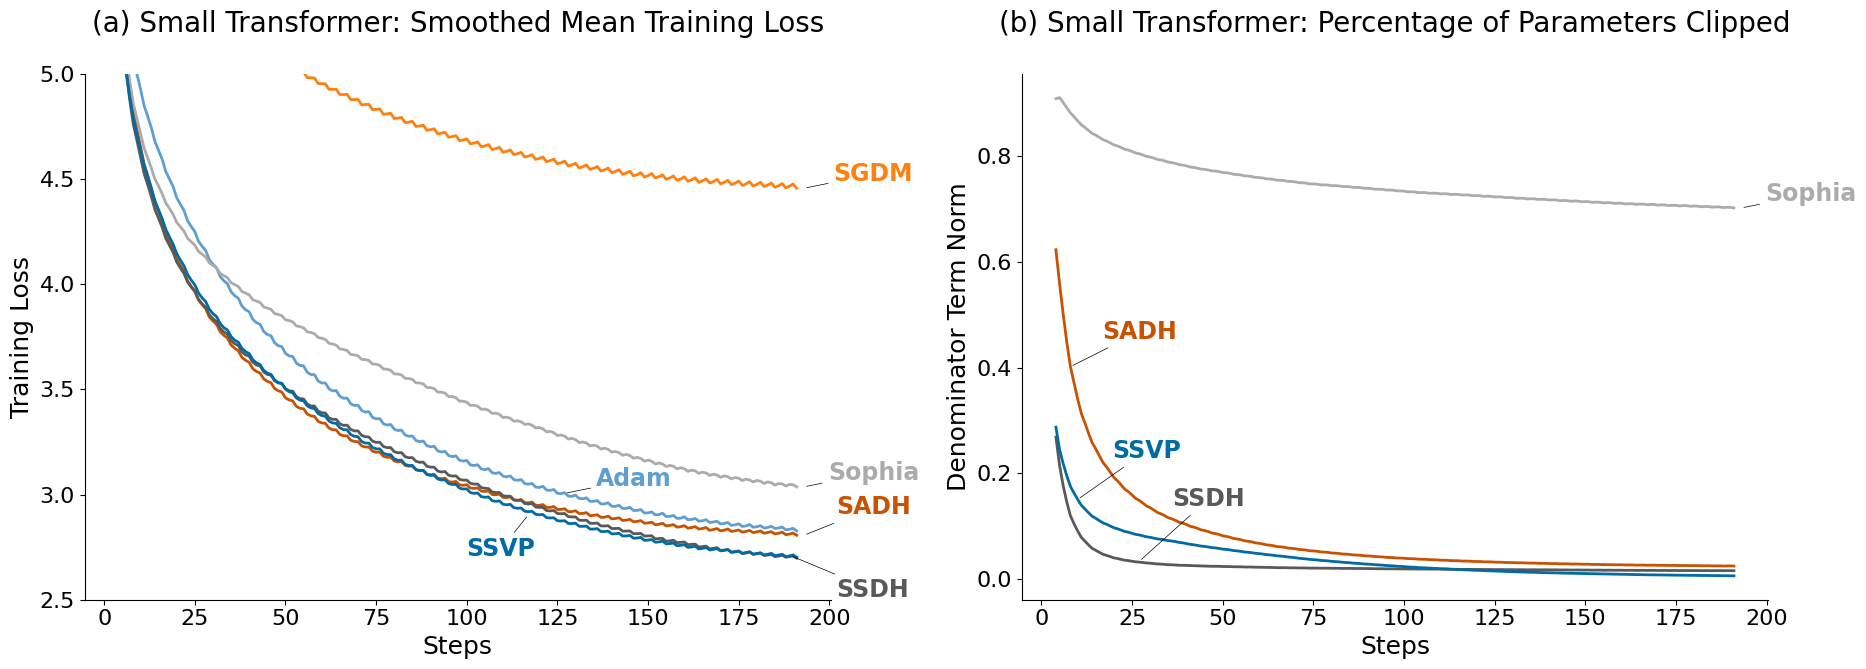

In [60]:
# plot training loss can clip percentage for transformer
var_to_plot1 = 'training_loss'
var_to_plot2 = 'clip_pct'
rolling_window = 5
fig, axs = plt.subplots(1, 2, figsize=(19, 7))

for opt_name, data_dict in transformer_data_dict.items():
    axs[0].plot(data_dict.get_series_mean(var_to_plot1).rolling(rolling_window).mean(), label=opt_name, c=colors[opt_name])
    if opt_name in ['Adam', 'SGDM']:
        continue
    axs[1].plot(data_dict.get_series_mean(var_to_plot2).rolling(rolling_window).mean(), label=opt_name, c=colors[opt_name])


axs[0].annotate('SSVP', 
            xy=(list(range(len(transformer_data_dict['SSVP'].get_series_mean(var_to_plot1).rolling(5).mean())))[120]-3, list(transformer_data_dict['SSVP'].get_series_mean(var_to_plot1).rolling(5).mean())[120]), 
            textcoords="offset points", 
            xytext=(-20,-30), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSVP']
            ) 


axs[0].annotate('SSDH', 
            xy=(list(range(len(transformer_data_dict['SSDH'].get_series_mean(var_to_plot1).rolling(5).mean())))[-5]+2, list(transformer_data_dict['SSDH'].get_series_mean(var_to_plot1).rolling(5).mean())[-5]), 
            textcoords="offset points", 
            xytext=(60,-30), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSDH']
            ) 

axs[0].annotate('Adam', 
            xy=(list(range(len(transformer_data_dict['Adam'].get_series_mean(var_to_plot1).rolling(5).mean())))[125]+2, list(transformer_data_dict['Adam'].get_series_mean(var_to_plot1).rolling(5).mean())[125]), 
            textcoords="offset points", 
            xytext=(50,5), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Adam']
            ) 

axs[0].annotate('SADH', 
            xy=(list(range(len(transformer_data_dict['SADH'].get_series_mean(var_to_plot1).rolling(5).mean())))[-1]+2, list(transformer_data_dict['SADH'].get_series_mean(var_to_plot1).rolling(5).mean())[-1]), 
            textcoords="offset points", 
            xytext=(50,15), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SADH']
            ) 

axs[0].annotate('SGDM', 
            xy=(list(range(len(transformer_data_dict['SGDM'].get_series_mean(var_to_plot1).rolling(5).mean())))[-1]+2, list(transformer_data_dict['SGDM'].get_series_mean(var_to_plot1).rolling(5).mean())[-1]), 
            textcoords="offset points", 
            xytext=(50,5), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SGDM']
            ) 

axs[0].annotate('Sophia', 
            xy=(list(range(len(transformer_data_dict['Sophia'].get_series_mean(var_to_plot1).rolling(5).mean())))[-1]+2, list(transformer_data_dict['Sophia'].get_series_mean(var_to_plot1).rolling(5).mean())[-1]), 
            textcoords="offset points", 
            xytext=(50,5), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Sophia']
            ) 

axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].set_xlabel('Steps')
axs[0].set_ylabel('Training Loss')
axs[0].set_title('(a) Small Transformer: Smoothed Mean Training Loss', pad=30)
axs[0].set_ylim(2.5, 5)



axs[1].annotate('Sophia', 
            xy=(list(range(len(transformer_data_dict['Sophia'].get_series_mean(var_to_plot2).rolling(5).mean())))[-1]+2, list(transformer_data_dict['Sophia'].get_series_mean(var_to_plot2).rolling(5).mean())[-1]), 
            textcoords="offset points", 
            xytext=(50,5), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Sophia']
            ) 


axs[1].annotate('SSDH', 
            xy=(list(range(len(transformer_data_dict['SSDH'].get_series_mean(var_to_plot2).rolling(5).mean())))[25]+2, list(transformer_data_dict['SSDH'].get_series_mean(var_to_plot2).rolling(5).mean())[25]), 
            textcoords="offset points", 
            xytext=(50,40), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSDH']
            ) 

axs[1].annotate('SADH', 
            xy=(list(range(len(transformer_data_dict['SADH'].get_series_mean(var_to_plot2).rolling(5).mean())))[8], list(transformer_data_dict['SADH'].get_series_mean(var_to_plot2).rolling(5).mean())[8]), 
            textcoords="offset points", 
            xytext=(50,20), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SADH']
            ) 

axs[1].annotate('SSVP', 
            xy=(list(range(len(transformer_data_dict['SSVP'].get_series_mean(var_to_plot2).rolling(5).mean())))[10], list(transformer_data_dict['SSVP'].get_series_mean(var_to_plot2).rolling(5).mean())[10]), 
            textcoords="offset points", 
            xytext=(50,30), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSVP']
            ) 





axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[1].set_xlabel('Steps')
axs[1].set_ylabel('Denominator Term Norm')
axs[1].set_title('(b) Small Transformer: Percentage of Parameters Clipped', pad=30)





plt.tight_layout()


plt.show()

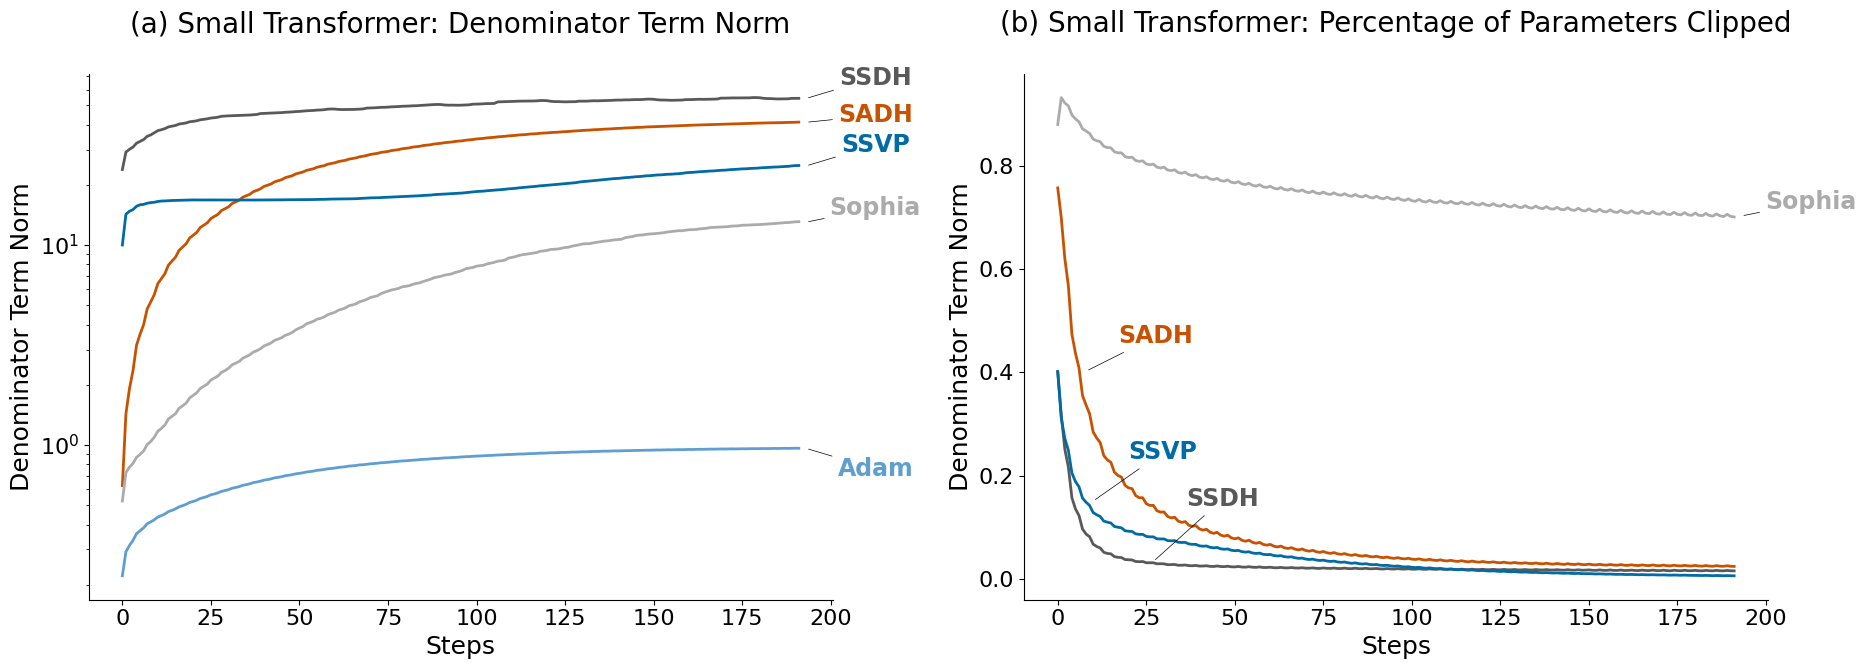

In [57]:
# plot the denominator norm and clipping percentage on transformer
fig, axs = plt.subplots(1, 2, figsize=(19, 7))

var_to_plot1='denominator_norm'
var_to_plot2='clip_pct'



for opt_name, data_dict in transformer_data_dict.items():
    denom = data_dict.get_series_mean(var_to_plot1)
    if denom is None:
        continue
    axs[0].semilogy(denom, label=opt_name, c=colors[opt_name])

for opt_name, data_dict in transformer_data_dict.items():
    if opt_name in ['SGDM', 'Adam']:
        continue
    clips = data_dict.get_series_mean(var_to_plot2)

    axs[1].plot(clips, label=opt_name, c=colors[opt_name])



axs[0].annotate('Sophia', 
            xy=(list(range(len(transformer_data_dict['Sophia'].get_series_mean(var_to_plot1).rolling(5).mean())))[-1]+2, list(transformer_data_dict['Sophia'].get_series_mean(var_to_plot1).rolling(5).mean())[-1]), 
            textcoords="offset points", 
            xytext=(50,5), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Sophia']
            ) 

axs[0].annotate('SGDM', 
            xy=(list(range(len(transformer_data_dict['SGDM'].get_series_mean(var_to_plot1).rolling(5).mean())))[-1]+2, list(transformer_data_dict['SGDM'].get_series_mean(var_to_plot1).rolling(5).mean())[-1]), 
            textcoords="offset points", 
            xytext=(50,5), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SGDM']
            ) 

axs[0].annotate('SSDH', 
            xy=(list(range(len(transformer_data_dict['SSDH'].get_series_mean(var_to_plot1).rolling(5).mean())))[-1]+2, list(transformer_data_dict['SSDH'].get_series_mean(var_to_plot1).rolling(5).mean())[-1]), 
            textcoords="offset points", 
            xytext=(50,10), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSDH']
            ) 

axs[0].annotate('SADH', 
            xy=(list(range(len(transformer_data_dict['SADH'].get_series_mean(var_to_plot1).rolling(5).mean())))[-1]+2, list(transformer_data_dict['SADH'].get_series_mean(var_to_plot1).rolling(5).mean())[-1]), 
            textcoords="offset points", 
            xytext=(50,0), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SADH']
            ) 

axs[0].annotate('SSVP', 
            xy=(list(range(len(transformer_data_dict['SSVP'].get_series_mean(var_to_plot1).rolling(5).mean())))[-1]+2, list(transformer_data_dict['SSVP'].get_series_mean(var_to_plot1).rolling(5).mean())[-1]), 
            textcoords="offset points", 
            xytext=(50,10), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSVP']
            ) 


axs[0].annotate('Adam', 
            xy=(list(range(len(transformer_data_dict['Adam'].get_series_mean(var_to_plot1).rolling(5).mean())))[-1]+2, list(transformer_data_dict['Adam'].get_series_mean(var_to_plot1).rolling(5).mean())[-1]), 
            textcoords="offset points", 
            xytext=(50,-20), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Adam']
            ) 


axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[0].set_xlabel('Steps')
axs[0].set_ylabel('Denominator Term Norm')
axs[0].set_title('(a) Small Transformer: Denominator Term Norm', pad=30)


axs[1].annotate('Sophia', 
            xy=(list(range(len(transformer_data_dict['Sophia'].get_series_mean(var_to_plot2).rolling(5).mean())))[-1]+2, list(transformer_data_dict['Sophia'].get_series_mean(var_to_plot2).rolling(5).mean())[-1]), 
            textcoords="offset points", 
            xytext=(50,5), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Sophia']
            ) 


axs[1].annotate('SSDH', 
            xy=(list(range(len(transformer_data_dict['SSDH'].get_series_mean(var_to_plot2).rolling(5).mean())))[25]+2, list(transformer_data_dict['SSDH'].get_series_mean(var_to_plot2).rolling(5).mean())[25]), 
            textcoords="offset points", 
            xytext=(50,40), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSDH']
            ) 

axs[1].annotate('SADH', 
            xy=(list(range(len(transformer_data_dict['SADH'].get_series_mean(var_to_plot2).rolling(5).mean())))[8], list(transformer_data_dict['SADH'].get_series_mean(var_to_plot2).rolling(5).mean())[8]), 
            textcoords="offset points", 
            xytext=(50,20), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SADH']
            ) 

axs[1].annotate('SSVP', 
            xy=(list(range(len(transformer_data_dict['SSVP'].get_series_mean(var_to_plot2).rolling(5).mean())))[10], list(transformer_data_dict['SSVP'].get_series_mean(var_to_plot2).rolling(5).mean())[10]), 
            textcoords="offset points", 
            xytext=(50,30), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSVP']
            ) 





axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[1].set_xlabel('Steps')
axs[1].set_ylabel('Denominator Term Norm')
axs[1].set_title('(b) Small Transformer: Percentage of Parameters Clipped', pad=30)



plt.tight_layout()


plt.show()

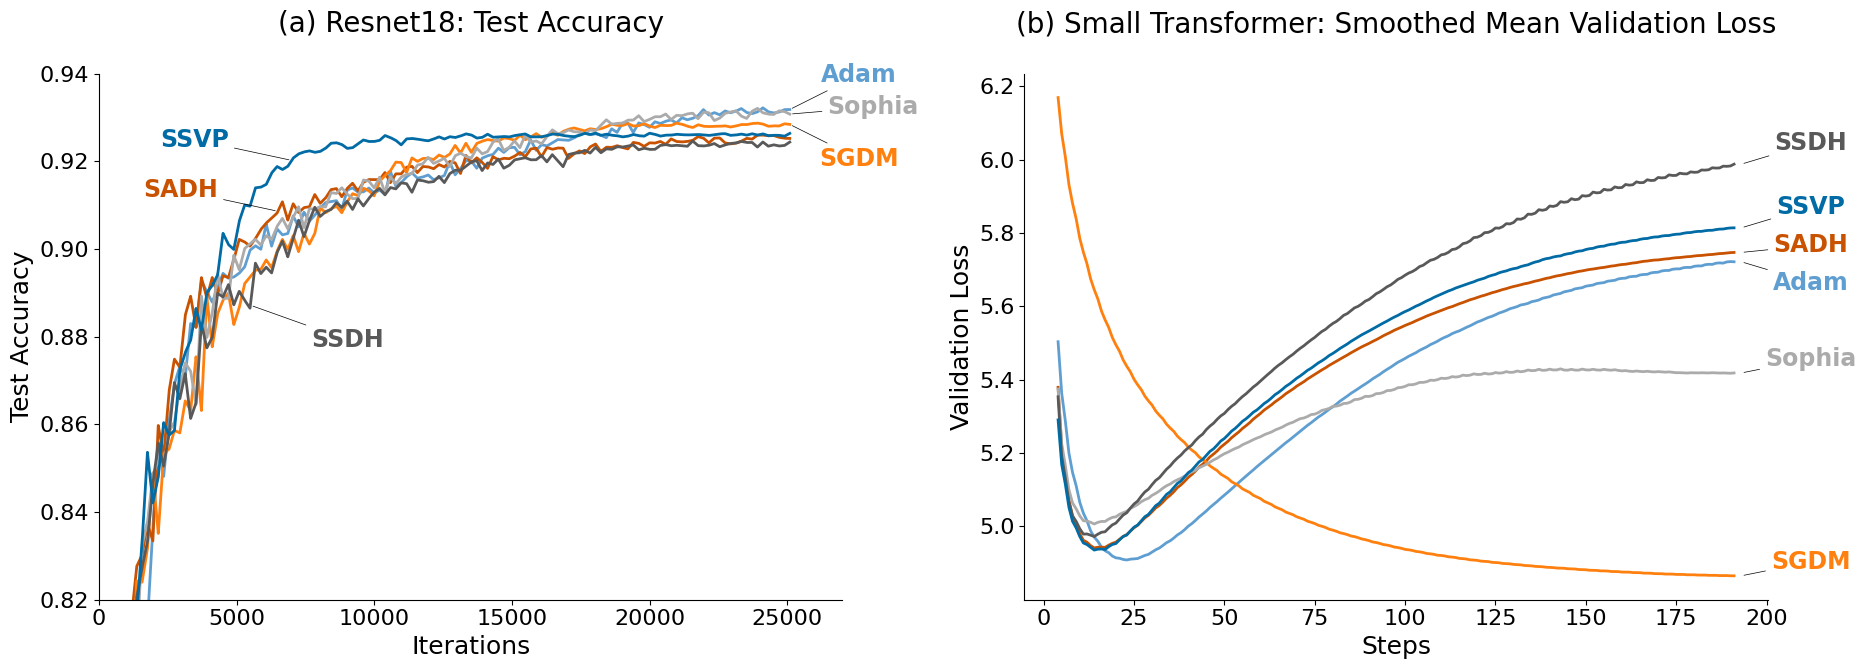

In [77]:
# plot test accuracy for the resnet18 and validation loss for transformer
var_to_plot1= 'test_acc'
var_to_plot2 = 'valid_loss'
rolling_window = 5
fig, axs = plt.subplots(1, 2, figsize=(19, 7))

for opt_name, data_dict in resnet18_data_dict.items():
    test_acc = data_dict.get_series_mean(var_to_plot1).interpolate(method='linear')
    axs[0].plot(test_acc, label=opt_name, c=colors[opt_name])

for opt_name, data_dict in transformer_data_dict.items():
    valid_loss = data_dict.get_series_mean(var_to_plot2).rolling(rolling_window).mean()
    axs[1].plot(valid_loss, label=opt_name, c=colors[opt_name])


axs[0].annotate('SSVP', 
            xy=(list(range(len(resnet18_data_dict['SSVP'].get_series_mean(var_to_plot1).interpolate(method='linear'))))[7000], list(resnet18_data_dict['SSVP'].get_series_mean(var_to_plot1).interpolate(method='linear'))[7000]), 
            textcoords="offset points", 
            xytext=(-70,10), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSVP']
            ) 


axs[0].annotate('SADH', 
            xy=(list(range(len(resnet18_data_dict['SADH'].get_series_mean(var_to_plot1).interpolate(method='linear'))))[6500], list(resnet18_data_dict['SADH'].get_series_mean(var_to_plot1).interpolate(method='linear'))[6500]), 
            textcoords="offset points", 
            xytext=(-70,10), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SADH']
            ) 


axs[0].annotate('SGDM', 
            xy=(list(range(len(resnet18_data_dict['SGDM'].get_series_mean(var_to_plot1).interpolate(method='linear'))))[-1], list(resnet18_data_dict['SGDM'].get_series_mean(var_to_plot1).interpolate(method='linear'))[-1]), 
            textcoords="offset points", 
            xytext=(50,-30), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SGDM']
            ) 

axs[0].annotate('Sophia', 
            xy=(list(range(len(resnet18_data_dict['Sophia'].get_series_mean(var_to_plot1).interpolate(method='linear'))))[-1], list(resnet18_data_dict['Sophia'].get_series_mean(var_to_plot1).interpolate(method='linear'))[-1]), 
            textcoords="offset points", 
            xytext=(60,0), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Sophia']
            ) 



axs[0].annotate('SSDH', 
            xy=(list(range(len(resnet18_data_dict['SSDH'].get_series_mean(var_to_plot1).interpolate(method='linear'))))[5500], list(resnet18_data_dict['SSDH'].get_series_mean(var_to_plot1).interpolate(method='linear'))[5500]), 
            textcoords="offset points", 
            xytext=(70,-30), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSDH']
            ) 

axs[0].annotate('Adam', 
            xy=(list(range(len(resnet18_data_dict['Adam'].get_series_mean(var_to_plot1).interpolate(method='linear'))))[-1], list(resnet18_data_dict['Adam'].get_series_mean(var_to_plot1).interpolate(method='linear'))[-1]), 
            textcoords="offset points", 
            xytext=(50,20), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Adam']
            ) 


axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)


axs[0].set_xlim(0, 27000)
axs[0].set_ylim(0, 0.1)
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('Test Accuracy')
axs[0].set_title('(a) Resnet18: Test Accuracy', pad=30)


axs[0].set_ylim(0.82, 0.94)






axs[1].annotate('Sophia', 
            xy=(list(range(len(transformer_data_dict['Sophia'].get_series_mean(var_to_plot2).rolling(5).mean())))[-1]+2, list(transformer_data_dict['Sophia'].get_series_mean(var_to_plot2).rolling(5).mean())[-1]), 
            textcoords="offset points", 
            xytext=(50,5), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Sophia']
            ) 

axs[1].annotate('SGDM', 
            xy=(list(range(len(transformer_data_dict['SGDM'].get_series_mean(var_to_plot2).rolling(5).mean())))[-1]+2, list(transformer_data_dict['SGDM'].get_series_mean(var_to_plot2).rolling(5).mean())[-1]), 
            textcoords="offset points", 
            xytext=(50,5), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SGDM']
            ) 

axs[1].annotate('SSDH', 
            xy=(list(range(len(transformer_data_dict['SSDH'].get_series_mean(var_to_plot2).rolling(5).mean())))[-1]+2, list(transformer_data_dict['SSDH'].get_series_mean(var_to_plot2).rolling(5).mean())[-1]), 
            textcoords="offset points", 
            xytext=(50,10), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSDH']
            ) 

axs[1].annotate('SADH', 
            xy=(list(range(len(transformer_data_dict['SADH'].get_series_mean(var_to_plot2).rolling(5).mean())))[-1]+2, list(transformer_data_dict['SADH'].get_series_mean(var_to_plot2).rolling(5).mean())[-1]), 
            textcoords="offset points", 
            xytext=(50,0), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SADH']
            ) 

axs[1].annotate('SSVP', 
            xy=(list(range(len(transformer_data_dict['SSVP'].get_series_mean(var_to_plot2).rolling(5).mean())))[-1]+2, list(transformer_data_dict['SSVP'].get_series_mean(var_to_plot2).rolling(5).mean())[-1]), 
            textcoords="offset points", 
            xytext=(50,10), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['SSVP']
            ) 


axs[1].annotate('Adam', 
            xy=(list(range(len(transformer_data_dict['Adam'].get_series_mean(var_to_plot2).rolling(5).mean())))[-1]+2, list(transformer_data_dict['Adam'].get_series_mean(var_to_plot2).rolling(5).mean())[-1]), 
            textcoords="offset points", 
            xytext=(50,-20), 
            ha='center',
            fontweight='bold',
            arrowprops=dict(arrowstyle=arrowstyle, lw=linewidth, color=linecolor),
            c=colors['Adam']
            ) 


axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[1].set_xlabel('Steps')
axs[1].set_ylabel('Validation Loss')
axs[1].set_title('(b) Small Transformer: Smoothed Mean Validation Loss', pad=30)



plt.tight_layout()
plt.show()